In [4]:
import pandas as pd

In [7]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [8]:
fn = r'D:\Documents\R&D\RnD_Resiliency\Test Scripts\LKA.nc'

In [9]:
ds = nc.Dataset(fn)

In [10]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
    history: Thu May 19 11:25:30 2016: cdo -f nc4 sellonlatbox,79,83,5.5,10.5 pr_day_BCSD_rcp45_r1i1p1_CanESM2_rimes.nc LKA.nc
Fri Feb 19 12:38:11 2016: cdo -f nc4 mergetime pr_day_BCSD_rcp45_r1i1p1_CanESM2_2006.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2007.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2008.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2009.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2010.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2011.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2012.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2013.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2014.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2015.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2016.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2017.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2018.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2019.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2020.nc pr_day_BCSD_rcp45_r1i1p1_CanESM2_2021.nc pr_day_BCSD

In [11]:
# This convert data in numpy Masked Array. (Masked Arrais can deal with missing data)
pr = ds['pr'][:]
lon = ds['lon'][:]
lat = ds['lat'][:]
time = ds['time'][:]

In [12]:
# example of masked array
lon

masked_array(data=[79.125, 79.375, 79.625, 79.875, 80.125, 80.375, 80.625,
                   80.875, 81.125, 81.375, 81.625, 81.875, 82.125, 82.375,
                   82.625, 82.875],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [16]:
time_var = ds.variables['time']
dtime = nc.num2date(time_var[:],time_var.units)
dtime

masked_array(data=[cftime.DatetimeGregorian(2005, 11, 24, 12, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2005, 11, 25, 12, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2005, 11, 26, 12, 0, 0, 0, has_year_zero=False),
                   ...,
                   cftime.DatetimeGregorian(2100, 10, 29, 12, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2100, 10, 30, 12, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2100, 10, 31, 12, 0, 0, 0, has_year_zero=False)],
             mask=False,
       fill_value='?',
            dtype=object)

In [8]:
# pip install basemap to install Basemap
from mpl_toolkits.basemap import Basemap
mp = Basemap(llcrnrlon=79,   # lower longitude
             llcrnrlat=5.7,    # lower latitude
             urcrnrlon=83,   # uppper longitude
             urcrnrlat=10.4)

<ipython-input-10-a1efddb65d53>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x,y,np.squeeze(pr[0,:,:]),cmap = 'jet') # [0,:,:] is for the first day of the year


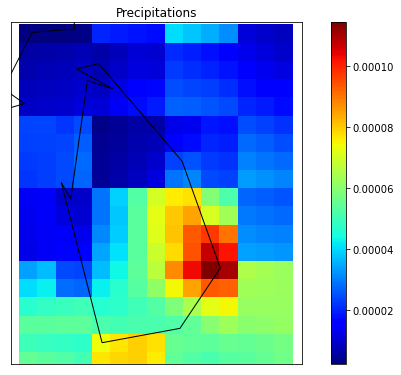

In [10]:
# Here you can plot the intensity over the map for a specific time
long, lats = np.meshgrid(lon,lat)  #this converts coordinates into 2D arrray
x,y = mp(long, lats) #mapping them together 
plt.figure(figsize=(6,8)) #figure size 
c_scheme = mp.pcolor(x,y,np.squeeze(pr[0,:,:]),cmap = 'jet') # [0,:,:] is for the first day of the year

# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.title('Precipitations')
plt.show()

#plt.savefig('tave.jpg',dpi=300) #saves the image generated


In [12]:
# this will create 365 images in the path given 
# please set the path before executing 
long, lats = np.meshgrid(lon,lat)
x,y = mp(long, lats)
plt.figure(figsize=(6,8))

# loop for all the days 
time_steps = np.arange(0,100)  # for considering a number of time steps

for i in time_steps:
    c_scheme = mp.pcolor(x,y,np.squeeze(pr[i,:,:]),cmap = 'jet')
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()

    cbar = mp.colorbar(c_scheme,location='right',pad = '10%')
    i = i+1

    plt.title('Precipitation ' + str(i) +  ' time')
    plt.clim(0.00004,0.0002)
    plt.savefig(r'D:\Documents\R&D\RnD_Resiliency\Test Scripts\img'+ '\\' + str(i)+'.jpg')
     
    plt.clf()

<ipython-input-12-c2d028b592b8>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x,y,np.squeeze(pr[i,:,:]),cmap = 'jet')


<Figure size 432x576 with 0 Axes>

In [14]:
import PIL

image_frames = [] # creating a empty list to be appended later on
time_steps = np.arange(1,100)

for k in time_steps:
    new_fram = PIL.Image.open(r'D:\Documents\R&D\RnD_Resiliency\Test Scripts\img' + '\\' + str(k) + '.jpg') 
    image_frames.append(new_fram)

image_frames[0].save(r'D:\Documents\R&D\RnD_Resiliency\Test Scripts\img\pr_timelapse.gif',format='GIF',
                    append_images = image_frames[1: ],
                    save_all = True, duration = 100,
                    loop = 0)

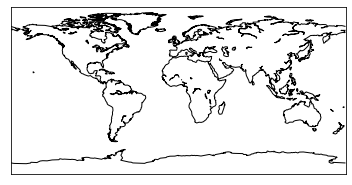

In [15]:
# just for fun
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap()

map.drawcoastlines()

plt.show()